In [12]:
from tennis_tracker.download_data.extract_keypoints import read_json_file

file_path = "/Users/derek/Desktop/tennis_tracker/tennis_tracker/download_data/labels.json"
data = read_json_file(file_path)

In [13]:
import numpy as np
out = np.array([[1, 2, 3]])
out.tolist()

[[1, 2, 3]]

In [14]:
from matplotlib import pyplot as plt
from tennis_tracker.player_location.homography import read_court_coords
import cv2
import numpy as np

court_txt_file="/Users/derek/Desktop/tennis_tracker/tennis_tracker/player_location/padded_click_coordinates.txt"
img_path = list(data.keys())[0]
image_dims = data[img_path]["image_dims"]
image_dims[0] *= 2
image_dims[1] *= 2
keypoints = data[img_path]['keypoints']
court_coordinates = np.array(read_court_coords(court_txt_file))

m, _ = cv2.findHomography(np.array(keypoints), court_coordinates)


In [16]:
m.shape

(3, 3)

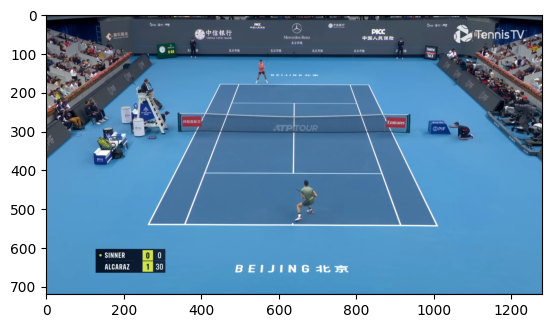

In [17]:
from PIL import Image

img = Image.open(img_path).resize((image_dims[1], image_dims[0]))
plt.imshow(img)
point = np.array([600, 500], dtype=np.float32).reshape(-1, 1, 2)
output = cv2.perspectiveTransform(point, m)

In [18]:
point.shape

(1, 1, 2)

In [10]:
output

(1, 1, 2)

[269.9493  573.82074]


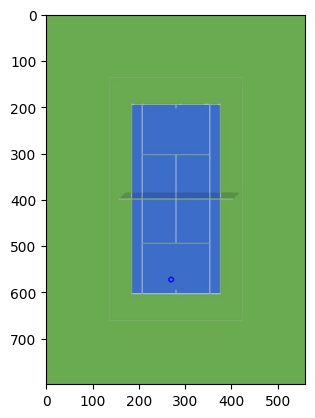

In [8]:
def draw_points(image, points: list[int]):
    """draws a circle at each point in the quad"""
    for point in points:
        print(point)
        cv2.circle(image, (int(point[0]), int(point[1])), 5, (0, 0, 255), 2)
    return image

court_image = Image.open("padded_court.jpg")
out = draw_points(np.array(court_image), [output[0][0]])
plt.imshow(out)